# Exercise: Merging Data

Usually, data analysis involves several tables of data that you must combine to answer your research question.

When you finish this exercise, you will learn how to merge data frames.

Load packages in **tidyverse**.

In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ──────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Mutating joins

There are four kinds of mutating joins and the resulting table would differ depending on how the observations are matched from the original tables. To illustrate, complete the code below to create two tables that will be used for merging. Use the **`tribble( )`** function to create a data frame, which is similar to the **`tibble( )`** function, but instead of creating a table by columns, it will create a table by rows. 

In [2]:
df1  <- tribble(
    ~Country, ~Year, ~Population,
    "Afghanistan", 2020, 38928000,
    "Bangladesh", 2020, 164689000,
    "Cambodia", 2020, 16719000
)

df2  <- tribble(
    ~Country, ~Year, ~GDP,
    "Afghanistan", 2020, 192910000,
    "Bangladesh", 2020, 164689000,
    "Indonesia", 2021, 111900000
)

df1
df2

Country,Year,Population
<chr>,<dbl>,<dbl>
Afghanistan,2020,38928000
Bangladesh,2020,164689000
Cambodia,2020,16719000


Country,Year,GDP
<chr>,<dbl>,<dbl>
Afghanistan,2020,192910000
Bangladesh,2020,164689000
Indonesia,2021,111900000


Simply joining the tables is challenging because the list of countries is not the same. The join functions describe below will be useful in solving this problem. The "Combine Tables" section of the [dplyr cheatsheet](https://raw.githubusercontent.com/rstudio/cheatsheets/master/data-transformation.pdf) will be handy if you don't remember the functions.

### Inner join

The **`inner_join(x, y)`** function will return observations that match in both x and y.

In [3]:
inner_join(df1, df2)

Joining, by = c("Country", "Year")



Country,Year,Population,GDP
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2020,38928000,192910000
Bangladesh,2020,164689000,164689000


Alternatively, you can use the pipe operator **`%>%`**.

In [4]:
df1 %>% inner_join(df2)

Joining, by = c("Country", "Year")



Country,Year,Population,GDP
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2020,38928000,192910000
Bangladesh,2020,164689000,164689000


### Left join

The **`left_join(x, y)`** function will return all observations in x, regardless of whether there is a match or not. This is the most commonly used join because it ensures that you will not loose observations from the primary table. Note that when a row does not match in a join, the new variables are filled in with missing values.

In [5]:
left_join(df1, df2)

Joining, by = c("Country", "Year")



Country,Year,Population,GDP
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2020,38928000,192910000
Bangladesh,2020,164689000,164689000
Cambodia,2020,16719000,NA


### Right join

The **`right_join(x, y)`** function will merge all observations in y, regardless of whether there is a match or not.

In [6]:
right_join(df1, df2)

Joining, by = c("Country", "Year")



Country,Year,Population,GDP
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2020,38928000,192910000
Bangladesh,2020,164689000,164689000
Indonesia,2021,NA,111900000


It is similar to the **`left_join(y, x)`** function, but the columns will be ordered differently. 

In [7]:
left_join(df2, df1)

Joining, by = c("Country", "Year")



Country,Year,GDP,Population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2020,192910000,38928000
Bangladesh,2020,164689000,164689000
Indonesia,2021,111900000,NA


### Full join

The **`full_join( )`** function will merge all observations from both x and y.

In [8]:
df1 %>% full_join(df2)

Joining, by = c("Country", "Year")



Country,Year,Population,GDP
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2020,38928000,192910000
Bangladesh,2020,164689000,164689000
Cambodia,2020,16719000,NA
Indonesia,2021,NA,111900000


## Filtering joins

Filtering joins match observations in the same way as mutating joins, except that filtering joins affect the observations, not the variables. There are two kinds of filtering joins, namely the **`semi_join( )`** and **`anti_join( )`** functions.

### Semi join

The **`semi_join(x, y)`** function keeps all observations in x that have a match in y.

In [9]:
df1 %>% semi_join(df2)

Joining, by = c("Country", "Year")



Country,Year,Population
<chr>,<dbl>,<dbl>
Afghanistan,2020,38928000
Bangladesh,2020,164689000


### Anti join

The **`anti_join(x, y)`** drops all observations in x that have a match in y. This function is useful when diagnosing join mismatches. For example, if you want to know which countries in **`df1`** has no entries in **`df2`**.

In [10]:
df1 %>% anti_join(df2)

Joining, by = c("Country", "Year")



Country,Year,Population
<chr>,<dbl>,<dbl>
Cambodia,2020,16719000


## Set operations

Set operations are usefult when you are combining rows or observations. When doing set operations, R expects that both x and y tables have the same variables, and treat the observations like sets, hence the name. Complete the cell below to create two tibbles.

In [11]:
table1  <- tribble(
    ~Country, ~Year, ~Population,
    "Afghanistan", 2020, 38928000,
    "Bangladesh", 2020, 164689000,
    "Cambodia", 2020, 16719000
)

table2  <- tribble(
    ~Country, ~Year, ~Population,
    "Cambodia", 2020, 16719000,
    "Indonesia", 2021, 111900000
)

table1
table2

Country,Year,Population
<chr>,<dbl>,<dbl>
Afghanistan,2020,38928000
Bangladesh,2020,164689000
Cambodia,2020,16719000


Country,Year,Population
<chr>,<dbl>,<dbl>
Cambodia,2020,16719000
Indonesia,2021,111900000


### Intersect

The **`intersect(x, y)`** will return only observations in that are common in both x and y.

In [12]:
intersect(table1, table2)

Country,Year,Population
<chr>,<dbl>,<dbl>
Cambodia,2020,16719000


### Union

The **`union(x, y)`** function will return unique observations in x and y.

In [13]:
table1 %>% union(table2)

Country,Year,Population
<chr>,<dbl>,<dbl>
Afghanistan,2020,38928000
Bangladesh,2020,164689000
Cambodia,2020,16719000
Indonesia,2021,111900000


### Setdiff

The **`setdiff(x, y)`** function will return observations in x, but not in y.

In [14]:
table1 %>% setdiff(table2)

Country,Year,Population
<chr>,<dbl>,<dbl>
Afghanistan,2020,38928000
Bangladesh,2020,164689000


The other scenario is that you want to return observations in y, but not in x.

In [15]:
table2 %>% setdiff(table1)

Country,Year,Population
<chr>,<dbl>,<dbl>
Indonesia,2021,111900000


# Joining tables

In this notebook, you will continue exploring the [COVID-19 dataset](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) to answer the question, how is the COVID-19 situation in your country? In the previous exercise, you analyzed the total number of COVID-19 cases over time to see how the pandemic is expanding in your country and in other countries. However, since the population among countries varies, it is better to compare COVID-19 cases per unit population rather than comparing absolute numbers. Thus, the population data from [World Bank](https://datacatalog.worldbank.org/dataset/population-estimates-and-projections) is needed in this analysis, which would require merging the two datasets to answer the question.

### COVID-19 dataset

Load the tidy confirmed COVID-19 dataset that you worked in the previous notebook. Use the **`col_types`** argument to explicitly tell R the type of vector for each column.

In [16]:
confirmed_covid  <- read_csv("confirmed_covid_tidy.csv",
                             col_types = cols(
                                 `Country/Region` = col_character(),
                                 date = col_date(format = "%m/%d/%y"),
                                 cases = col_double()
                             )
                            )

head(confirmed_covid)

Country/Region,date,cases
<chr>,<date>,<dbl>
Afghanistan,2020-01-22,0
Afghanistan,2020-01-23,0
Afghanistan,2020-01-24,0
Afghanistan,2020-01-25,0
Afghanistan,2020-01-26,0
Afghanistan,2020-01-27,0


### Population dataset

Load the tidy population dataset that you did in the previous notebook. 

In [17]:
population  <- read_csv("population_tidy.csv")
head(population)


── Column specification ─────────────────────────────────────────────────────
cols(
  `Country Name` = col_character(),
  year = col_double(),
  population = col_double()
)




Country Name,year,population
<chr>,<dbl>,<dbl>
Afghanistan,1960,8996973
Afghanistan,1961,9169410
Afghanistan,1962,9351441
Afghanistan,1963,9543205
Afghanistan,1964,9744781
Afghanistan,1965,9956320


Next, subset the population data for 2020 and then select only the columns containing country names and population, which will be needed for the analysis.

In [18]:
population_2020  <- population %>% 
                        filter(year == 2020) %>%
                        select(`Country Name`, population)
head(population_2020)

Country Name,population
<chr>,<dbl>
Afghanistan,38928000
Albania,2850000
Algeria,43851000
American Samoa,55000
Andorra,77000
Angola,32866000


Then, merge the confirmed COVID-19 and the population datasets.

In [19]:
merge  <- confirmed_covid %>% 
            left_join(population_2020,
                     by = c("Country/Region" = "Country Name")
                     )

Now, that you have combined the two tables, you can now create a new column containing the number of confirmed COVID-19 cases per 100,000 population.

In [20]:
merge  <- merge %>%
            mutate(rate = (cases/population) * 100000)

So, you can now generate a plot the to answer the question, how is the COVID-19 situation in your country, and compare it with other countries. You may modify the list countries to be included in the graph.

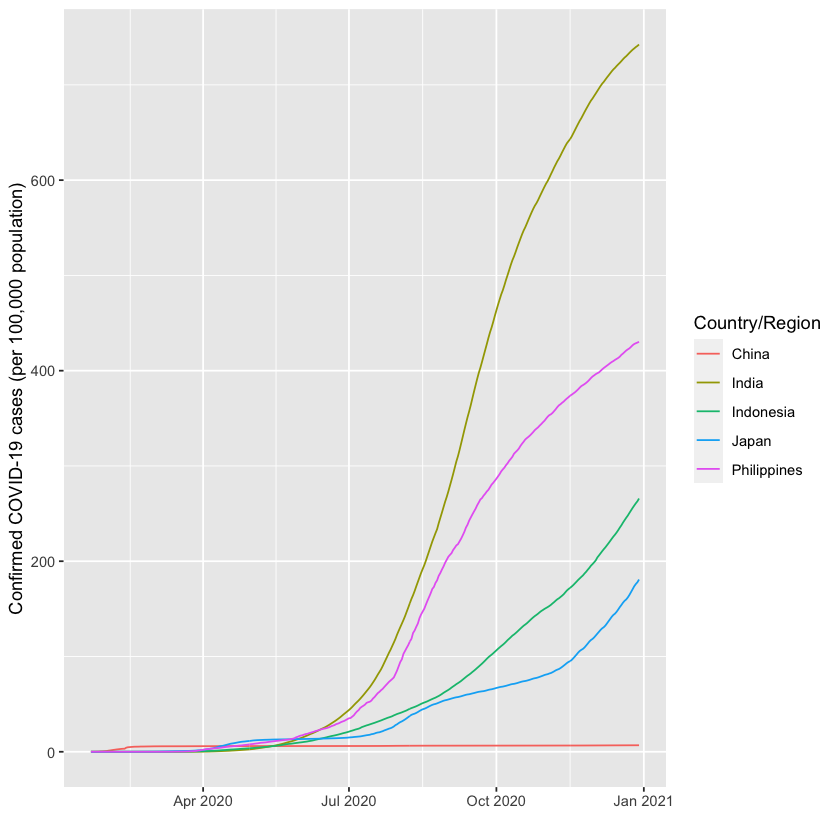

In [21]:
merge %>% 
    filter(`Country/Region` %in% c("China", "Japan", "India", "Indonesia", "Philippines")) %>% 
    ggplot(aes(date, rate, color = `Country/Region`)) +
    geom_line() +
    labs(
        x = "",
        y = "Confirmed COVID-19 cases (per 100,000 population)"
        )

Generate the same plot but in logarithmic scale, which will help you visualize early, middle (log phase), or late exponential growth.

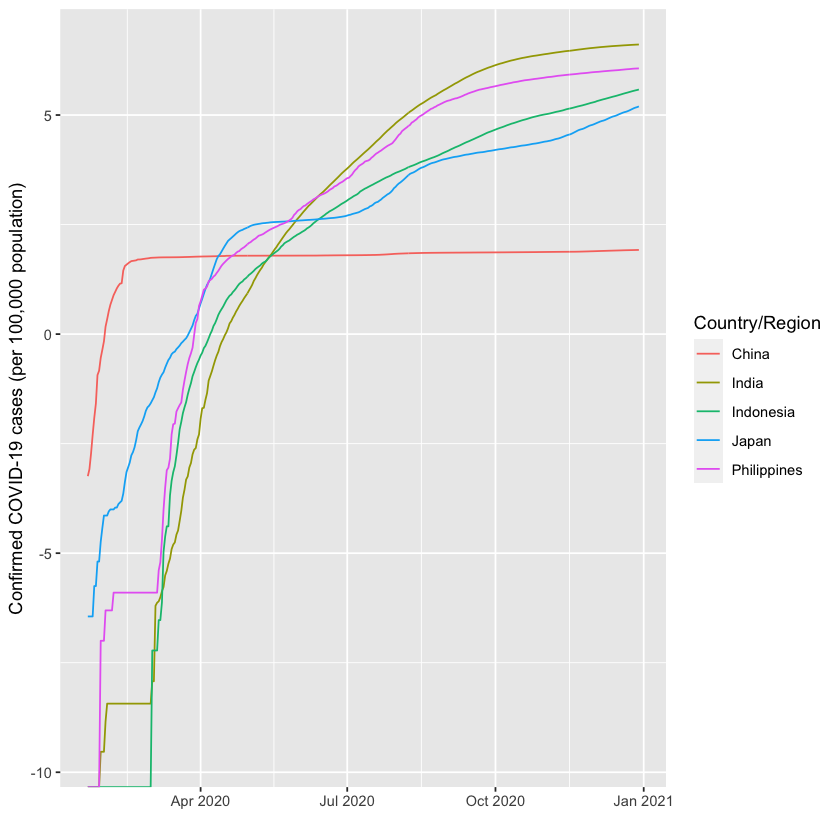

In [22]:
merge %>% 
    filter(`Country/Region` %in% c("China", "Japan", "India", "Indonesia", "Philippines")) %>% 
    ggplot(aes(date, log(rate), color = `Country/Region`)) +
    geom_line() +
    labs(
        x = "",
        y = "Confirmed COVID-19 cases (per 100,000 population)"
        )

## Saving your data

Before you end this exercise, save the merged data in either csv or RDS format.

In [23]:
# Save the merged data on population and confirmed COVID-19 cases
write_csv(merge,
         file = "merged_data.csv")